In [7]:
from pathlib import Path
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
from moonpies import moonpies as mp
from moonpies import default_config

mpl.rcParams.update({
    'font.size': 12,
    'axes.grid': False,
    'xtick.top': False,
    'xtick.bottom': False,
})

# Set Fig paths
FIGDIR = ''  # Set or leave blank to use default (moonpies/figs)
if not FIGDIR:
    FIGDIR = default_config.Cfg().figspath
FIGDIR = str(Path(FIGDIR).resolve() / "_")[:-1]  # add trailing slash

agg_layers = '/home/ctaiudovicic/projects/moonpies/data/out/220408_layers.csv'
agg_runs = '/home/ctaiudovicic/projects/moonpies/data/out/220408_runs.csv'

layers = pd.read_csv(agg_layers, header=[0, 1, 2])
runs = pd.read_csv(agg_runs, header=[0, 1, 2])
# runs.columns.names = ('coldtrap', 'run', 'stats')
# runs.head()
# stats = runs.groupby(level=['coldtrap', 'run']).agg(['min', 'median', 'max', 'mean', 'std'])

runs_flat = runs.stack(level=[0, 1, 2]).reset_index(level=0, drop=True).reset_index().drop(columns='level_2')
runs_flat.columns = ['coldtrap', 'bsed', 'total ice']
runs_flat.loc[runs_flat['total ice'] < 1, 'total ice'] = np.nan
runs_flat['log ice'] = np.log10(runs_flat['total ice'])
runs_flat['bsed'] = runs_flat['bsed'] == 'Ballistic Sedimentation'
runs_flat['bsed'] = runs_flat['bsed'].replace({True: 'Yes', False: 'No'})
runs_flat = runs_flat.rename(columns={'bsed': 'Ballistic Sedimentation'})
runs_flat.head()

# Order coldtraps by geologic era and latitude
coldtrap_order = ['Faustini','Haworth','Shoemaker','Cabeus B',"Idel'son L",'Amundsen','Cabeus','de Gerlache','Slater','Sverdrup','Wiechert J','Shackleton']
clist = mp.read_crater_list()
clist = clist.set_index('cname')
clist = clist.loc[coldtrap_order]
# clist = clist.sort_values('age', ascending=False)
# clist = clist.sort_values('lat', ascending=False)
sort_coldtrap = clist.index.values
sort_age = clist.age.values
sort_lat = clist.lat.values
# labels = [c+f'\n{age/1e9:.2f} Ga' for c, age in zip(sort_coldtrap, sort_age)]
labels = [c+f'\n{lat:.1f}°' for c, lat in zip(sort_coldtrap, sort_lat)]
# labels = [c+f'\ndist={90+lat:.2f}°' for c, lat in zip(sort_coldtrap, sort_lat)]

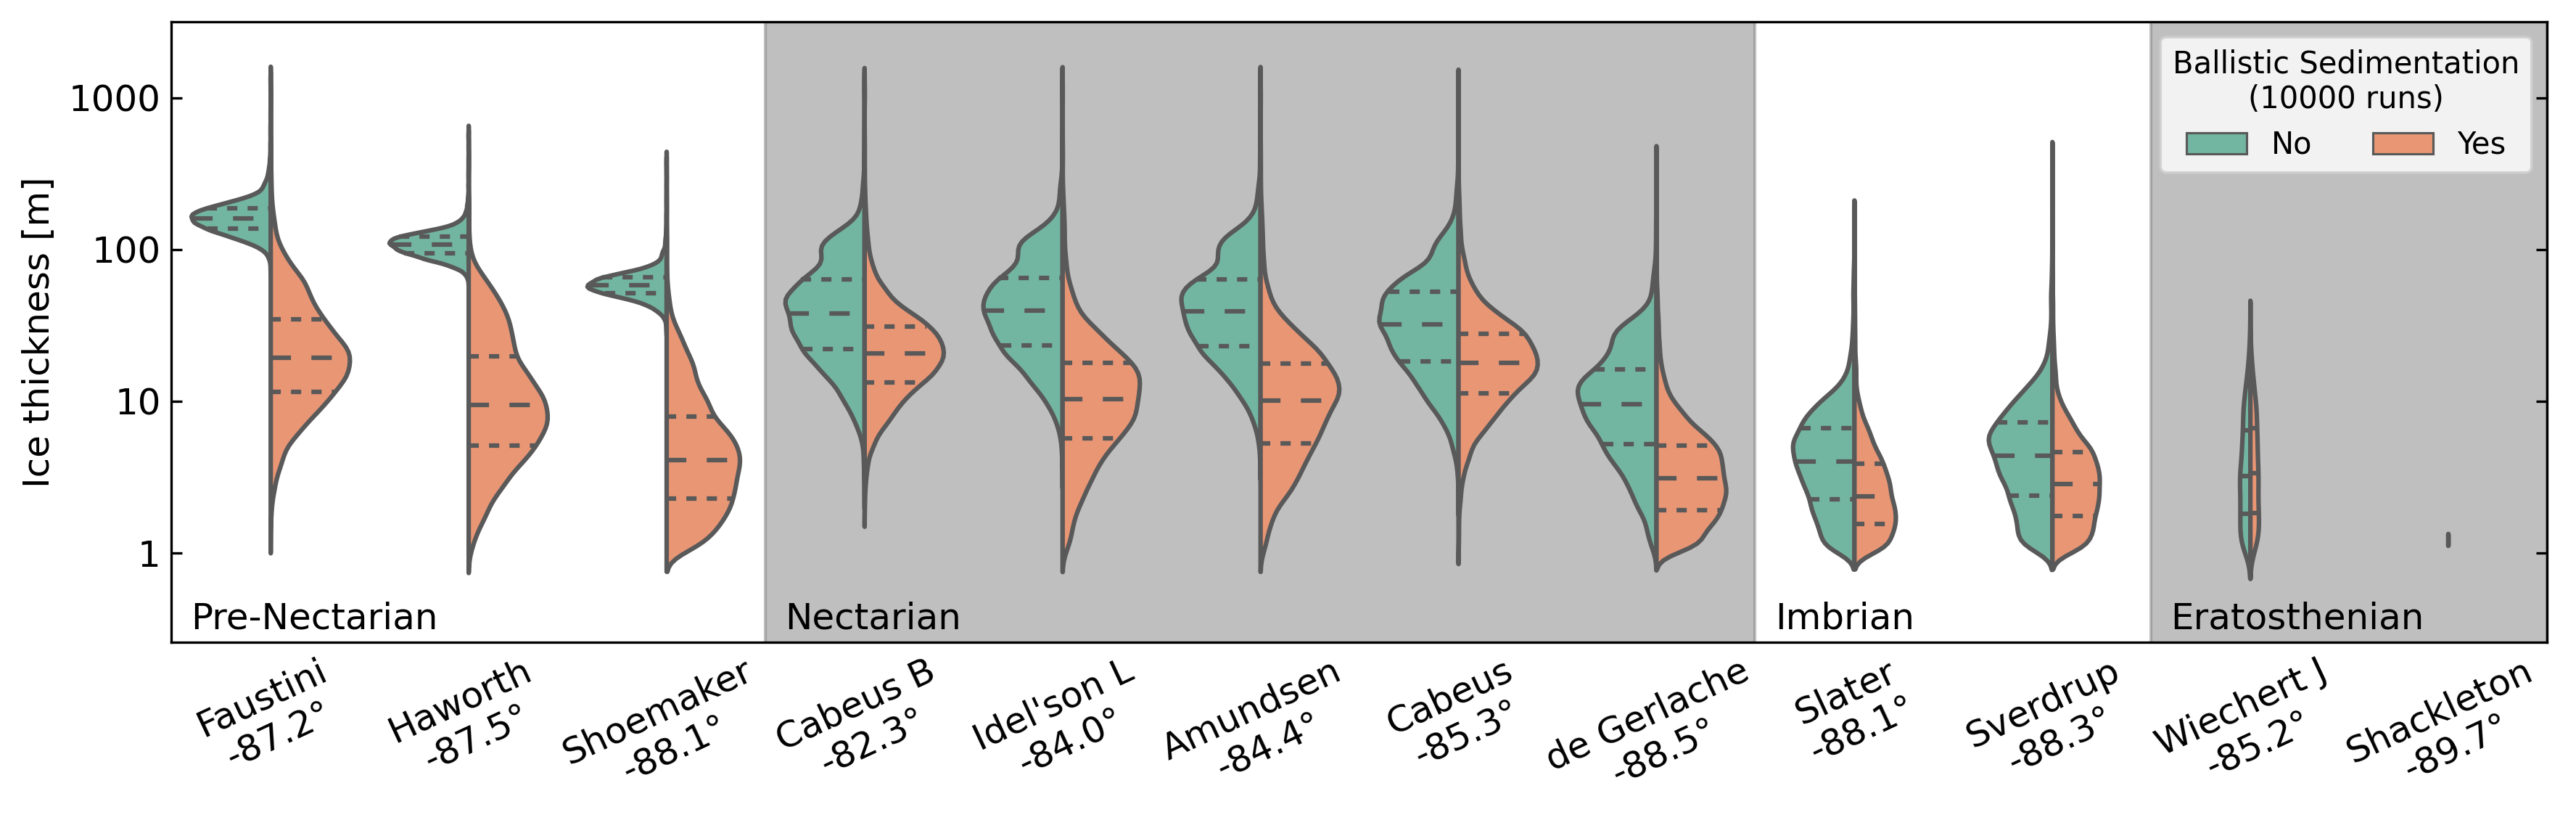

In [12]:
# Plot
fig, ax = plt.subplots(figsize=(12, 4), dpi=300)
# ax.set_facecolor('white')

# ax.fill_between([-0.5, 2.5], [0, 0], [3, 3], color='tab:blue', alpha=0.5)
ax.fill_between([2.5, 7.5], [-1, -1], [4, 4], color='gray', alpha=0.5)
ax.fill_between([9.5, 11.5], [-1, -1], [4, 4], color='gray', alpha=0.5)

ax = sns.violinplot(x='coldtrap', y='log ice', hue='Ballistic Sedimentation', 
                    hue_order=['No', 'Yes'], data=runs_flat, split=True, 
                    inner='quartiles', palette='Set2', order=sort_coldtrap,
                    scale='count', scale_hue=False, ax=ax)

# Plot a specific value on the violin plot
# ax.plot(['Haworth'], [1.5], 'ro')
ax.set_xticklabels(labels, rotation=25)
ax.set_ylabel('Ice thickness [m]')
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(10**ax.get_yticks())
ax.set_xlabel('')
ax.annotate('Pre-Nectarian', (-0.4, -0.5), fontsize=12)
ax.annotate('Nectarian', (2.6, -0.5), fontsize=12)
ax.annotate('Imbrian', (7.6, -0.5), fontsize=12)
ax.annotate('Eratosthenian', (9.6, -0.5), fontsize=12)
ax.set_ylim(-0.59, 3.5)
ax.set_xlim(-0.5, 11.5)

title = f'Ballistic Sedimentation\n({len(runs)} runs)'
leg = plt.legend(loc='upper right', ncol=2, title=title, fontsize=10, title_fontsize=10)
leg.get_title().set_multialignment('center')
# plt.savefig(FIGDIR + 'bsed_violin.png', bbox_inches='tight', facecolor='w', dpi=300)
plt.savefig(FIGDIR + 'bsed_violin.pdf', bbox_inches='tight')
plt.show()

In [43]:
print(
    len(runs_flat[(runs_flat.coldtrap == 'Slater') & (runs_flat['Ballistic Sedimentation'] == 'No')].dropna()),
    len(runs_flat[(runs_flat.coldtrap == 'Slater') & (runs_flat['Ballistic Sedimentation'] == 'Yes')].dropna()),
    len(runs_flat[(runs_flat.coldtrap == 'Wiechert J') & (runs_flat['Ballistic Sedimentation'] == 'No')].dropna()),
    len(runs_flat[(runs_flat.coldtrap == 'Wiechert J') & (runs_flat['Ballistic Sedimentation'] == 'Yes')].dropna()),
    len(runs_flat[(runs_flat.coldtrap == 'Shackleton') & (runs_flat['Ballistic Sedimentation'] == 'No')].dropna()),
    len(runs_flat[(runs_flat.coldtrap == 'Shackleton') & (runs_flat['Ballistic Sedimentation'] == 'Yes')].dropna())
)


7759 5229 1306 1080 3 3


In [4]:
runs[['Haworth', 'Faustini', 'Cabeus', 'Shackleton']].describe(percentiles=[0.5]).round(2)

Haworth                             \
      Ballistic Sedimentation No Ballistic Sedimentation   
                    total ice                  total ice   
count                10000.00                   10000.00   
mean                    15.82                     110.21   
std                     19.26                      25.30   
min                      0.58                      61.95   
50%                      9.41                     107.98   
max                    486.15                     570.97   

                     Faustini                             \
      Ballistic Sedimentation No Ballistic Sedimentation   
                    total ice                  total ice   
count                10000.00                   10000.00   
mean                    29.15                     167.05   
std                     39.97                      56.05   
min                      1.30                      72.17   
50%                     19.41                     160.00   
max                   1236.09                    1368.29   

                       Cabeus                             \
      Ballistic Sedimentation No Ballistic Sedimentation   
                    total ice                  total ice   
count                10000.00                   10000.00   
mean                    23.88                      41.88   
std                     35.30                      45.67   
min                      1.07                       2.27   
50%                     17.88                      32.00   
max                   1193.89                    1204.22   

                   Shackleton                             
      Ballistic Sedimentation No Ballistic Sedimentation  
                    total ice                  total ice  
count                10000.00                   10000.00  
mean                     0.02                       0.02  
std                      0.04                       0.04  
min                      0.00                       0.00  
50%                      0.00                       0.00  
max                      1.27                       1.27